## 1. 일별 수익률 & 누적 수익률
- `pct_change()` <- 수익률을 구하는 함수
- `cumpord()` <- 누적곱을 구하는 함수


In [43]:
import FinanceDataReader as fdr

df = fdr.DataReader('035420',start='2021')
df =df[['Close']]
df

,Close
Date,
2021-01-04,293000
2021-01-05,292500
2021-01-06,290000
2021-01-07,289500
2021-01-08,312000
...,...
2025-01-20,205000
2025-01-21,204500
2025-01-22,204000


In [44]:
((df['Close']- df['Close'].shift(1)) / df['Close'].shift(1)).fillna(0)

Date
2021-01-04    0.000000
2021-01-05   -0.001706
2021-01-06   -0.008547
2021-01-07   -0.001724
2021-01-08    0.077720
                ...   
2025-01-20   -0.019139
2025-01-21   -0.002439
2025-01-22   -0.002445
2025-01-23    0.002451
2025-01-24   -0.002445
Name: Close, Length: 1000, dtype: float64

In [45]:
def return_fn(df):
    return df[['Close']].pct_change().fillna(0)

df_return = return_fn(df)
df_return

,Close
Date,
2021-01-04,0.000000
2021-01-05,-0.001706
2021-01-06,-0.008547
2021-01-07,-0.001724
2021-01-08,0.077720
...,...
2025-01-20,-0.019139
2025-01-21,-0.002439
2025-01-22,-0.002445


In [46]:
def cum_return_fn(df_return):
    return (1+df_return).cumprod()

df_cum_return=cum_return_fn(df_return)
df_cum_return

,Close
Date,
2021-01-04,1.000000
2021-01-05,0.998294
2021-01-06,0.989761
2021-01-07,0.988055
2021-01-08,1.064846
...,...
2025-01-20,0.699659
2025-01-21,0.697952
2025-01-22,0.696246


In [47]:
(204000- 293000) / 293000 

-0.3037542662116041

In [48]:
(df_cum_return['Close'] -1).iloc[-1]

np.float64(-0.30375426621160273)

## 2. Draw Down & Max Draw Down
- `cummax()` : 데이터프레임을 하나씩 진행하면서 가장 큰 값을 반환해주는 함수

In [49]:
df['Return'] = return_fn(df)
df['CumReturn'] = cum_return_fn(df['Return'])
df['MaxCumReturn'] = df['CumReturn'].cummax()
df['DrawDown'] = (df['CumReturn'] / df['MaxCumReturn']) - 1

print(df['DrawDown'].min())

-0.6585903083700438


<Axes: xlabel='Date'>

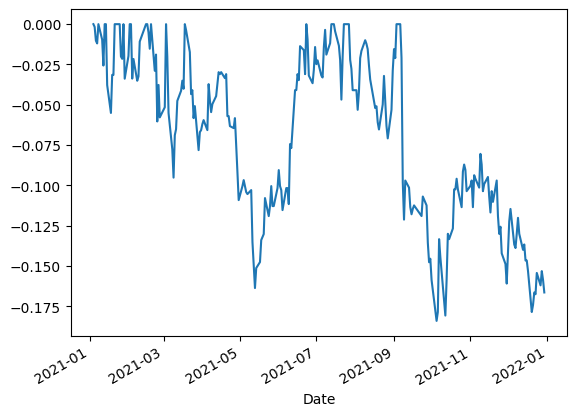

In [50]:
df.loc['2021-01-01':'2021-12-31','DrawDown'].plot()

## 3.종목정보

In [51]:
df = df.loc['2021-01-01':'2021-12-13']
df

,Close,Return,CumReturn,MaxCumReturn,DrawDown
Date,,,,,
2021-01-04,293000,0.000000,1.000000,1.000000,0.000000
2021-01-05,292500,-0.001706,0.998294,1.000000,-0.001706
2021-01-06,290000,-0.008547,0.989761,1.000000,-0.010239
2021-01-07,289500,-0.001724,0.988055,1.000000,-0.011945
2021-01-08,312000,0.077720,1.064846,1.064846,0.000000
...,...,...,...,...,...
2021-12-07,391000,-0.002551,1.334471,1.549488,-0.138767
2021-12-08,395000,0.010230,1.348123,1.549488,-0.129956
2021-12-09,399500,0.011392,1.363481,1.549488,-0.120044


In [52]:
mdd = df['DrawDown'].min()
print(mdd)

-0.18392070484581446


In [53]:
# 최저가
min_close_value = df['Close'].min()
# 최저가 날짜
min_date = df.index[df['Close'].argmin()]

# 최대가
max_close_value = df['Close'].max()
# 최대가 날짜
max_date = df['Close'].argmax()

print("최고 : {}\n최저: {}\nMDD : {}%\n최저날짜: {}".format(max_close_value,min_close_value,round(mdd*100,2),min_date))

최고 : 454000
최저: 289500
MDD : -18.39%
최저날짜: 2021-01-07 00:00:00


### DrawDown이 0이라는 것은 = 주가가 최고점을 찍었다는 것을 의미함!!!

In [55]:
df[df['DrawDown'] == 0]

,Close,Return,CumReturn,MaxCumReturn,DrawDown
Date,,,,,
2021-01-04,293000,0.000000,1.000000,1.000000,0.0
2021-01-08,312000,0.077720,1.064846,1.064846,0.0
2021-01-13,314000,0.032895,1.071672,1.071672,0.0
2021-01-14,318000,0.012739,1.085324,1.085324,0.0
2021-01-21,322500,0.047078,1.100683,1.100683,0.0
2021-01-22,343500,0.065116,1.172355,1.172355,0.0
2021-01-25,349000,0.016012,1.191126,1.191126,0.0
2021-01-28,355000,0.039531,1.211604,1.211604,0.0
2021-02-02,362500,0.041667,1.237201,1.237201,0.0


In [61]:
df_max_close=df[df['DrawDown'] == 0].copy()

df_max_close.loc[df.index[len(df)-1]] = 0

period = df_max_close.index[1:] - df_max_close.index[:-1]

mdd_days = period.days # 해당 날만큼 지금 전고점(최고점)을 갱신하지 못하고 있음 !!!!

max_period = mdd_days.max()
max_period_idx=mdd_days.argmax()

print("MAX Draw Down: {} ~ {}".format(df_max_close.index[:-1][max_period_idx].date(), df_max_close.index[1:][max_period_idx].date()))
print("{} days".format(max_period))
print("max period : {}".format(max_period))

MAX Draw Down: 2021-09-06 ~ 2021-12-13
98 days
max period : 98


## 4.최종함수(mdd_fn)

In [62]:
def mdd_fn(df):
    
    df = df[['Close']].copy()
    
    def return_fn(df):
        return df['Close'].pct_change().fillna(0)
    
    def cum_return_fn(df_return):
        return (1 + df_return).cumprod()
    
    df['Return'] = return_fn(df)
    
    df['CumReturn'] = cum_return_fn(df['Return'])
    
    df['MaxCumReturn'] = df['CumReturn'].cummax()
    
    df['DrawDown'] = (df['CumReturn'] / df['MaxCumReturn']) -1
    
    mdd = df['DrawDown'].min()
    
    list_info = list()
    
    # 최저가
    min_close_value = df['Close'].min()
    
    # 최고가
    max_close_value = df['Close'].max()

    print("최고: {}\n최저: {}\nMDD: {}".format(max_close_value, min_close_value,round(mdd*100,2)))
    
    df_max_close = df[df['DrawDown'] == 0].copy()

    df_max_close.loc[df.index[len(df)-1]] = 0

    period = df_max_close.index[1:] - df_max_close.index[:-1]

    mdd_days = period.days

    max_period = mdd_days.max()

    max_period_idx = mdd_days.argmax()

    print("MAX Draw Down: {} ~ {}".format(df_max_close.index[:-1][max_period_idx].date(), df_max_close.index[1:][max_period_idx].date()))
    print("{} days".format(max_period))
    print("max period : {}".format(max_period))
    
    list_info.append(max_close_value)
    list_info.append(min_close_value)
    list_info.append(round(mdd*100,2))
    list_info.append(df_max_close.index[:-1][max_period_idx].date())
    list_info.append(df_max_close.index[1:][max_period_idx].date())
    list_info.append(max_period)
          
    return df, list_info

In [63]:
import FinanceDataReader as fdr

df = fdr.DataReader("035420", start = '2021')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,291500,294000,285500,293000,947178,0.001709
2021-01-05,291500,292500,286500,292500,912657,-0.001706
2021-01-06,292500,300500,289500,290000,1375856,-0.008547
2021-01-07,288500,292000,286500,289500,1155734,-0.001724
2021-01-08,293500,312000,290000,312000,3175396,0.077720
...,...,...,...,...,...,...
2025-01-20,209000,209500,204500,205000,398841,-0.019139
2025-01-21,205000,208000,203000,204500,357682,-0.002439
2025-01-22,207000,211500,204000,204000,555170,-0.002445


In [69]:
df_mdd, stock_info = mdd_fn(df) # 2021년 9월 6일부터 최고점을 갱신하지 못하고 있음 !!!

최고: 454000
최저: 155000
MDD: -65.86
MAX Draw Down: 2021-09-06 ~ 2025-01-24
1236 days
max period : 1236


<Axes: xlabel='Date'>

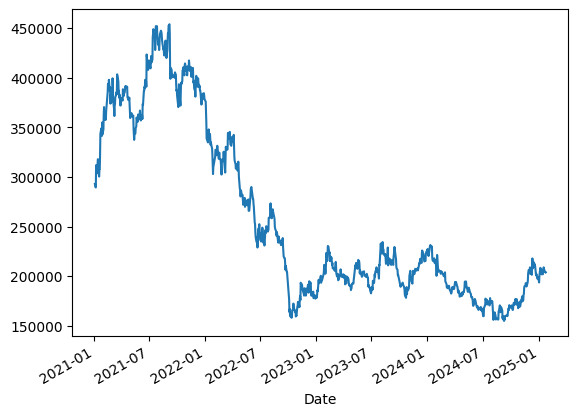

In [65]:
df['Close'].plot()

In [67]:
df_mdd

,Close,Return,CumReturn,MaxCumReturn,DrawDown
Date,,,,,
2021-01-04,293000,0.000000,1.000000,1.000000,0.000000
2021-01-05,292500,-0.001706,0.998294,1.000000,-0.001706
2021-01-06,290000,-0.008547,0.989761,1.000000,-0.010239
2021-01-07,289500,-0.001724,0.988055,1.000000,-0.011945
2021-01-08,312000,0.077720,1.064846,1.064846,0.000000
...,...,...,...,...,...
2025-01-20,205000,-0.019139,0.699659,1.549488,-0.548458
2025-01-21,204500,-0.002439,0.697952,1.549488,-0.549559
2025-01-22,204000,-0.002445,0.696246,1.549488,-0.550661


In [71]:
stock_info

[np.int64(454000),
 np.int64(155000),
 np.float64(-65.86),
 datetime.date(2021, 9, 6),
 datetime.date(2025, 1, 24),
 np.int64(1236)]